In [4]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
                       
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        

np.random.seed(123) 
pd.options.mode.chained_assignment = None  

In [5]:
data = pd.read_csv("heart.csv")
data.head()
data.sample(5)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])
data.shape

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


(303, 14)

target
1    165
0    138
Name: count, dtype: int64


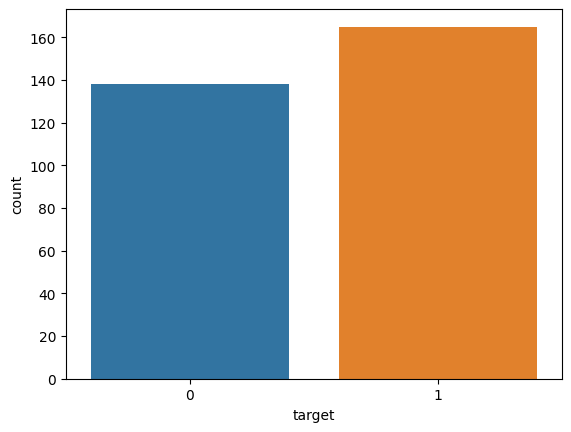

In [7]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

<Axes: xlabel='sex', ylabel='target'>

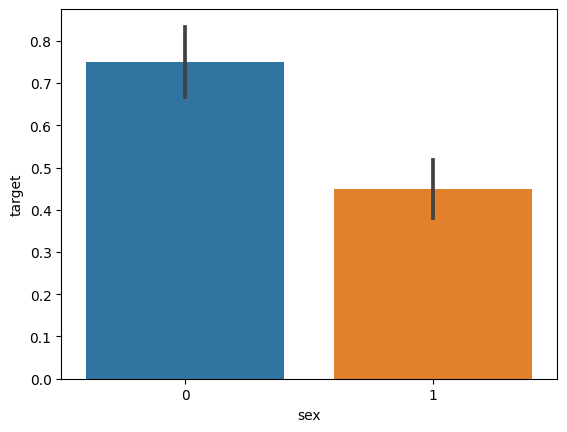

In [8]:
sns.barplot(data["sex"],data["target"])

In [9]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [10]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'


data['target'][data['target'] == 0] = 'no'
data['target'][data['target'] == 1] = 'yes'

In [11]:
list = []
for i in range(0,data.shape[1]):
  if(data.iloc[:,i].dtypes == 'object'):
    data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
    data.iloc[:,i] = data.iloc[:,i].cat.codes
    data.iloc[:,i] = data.iloc[:,i].astype('object')
    list.append(data.columns[i])

AttributeError: Can only use .cat accessor with a 'category' dtype

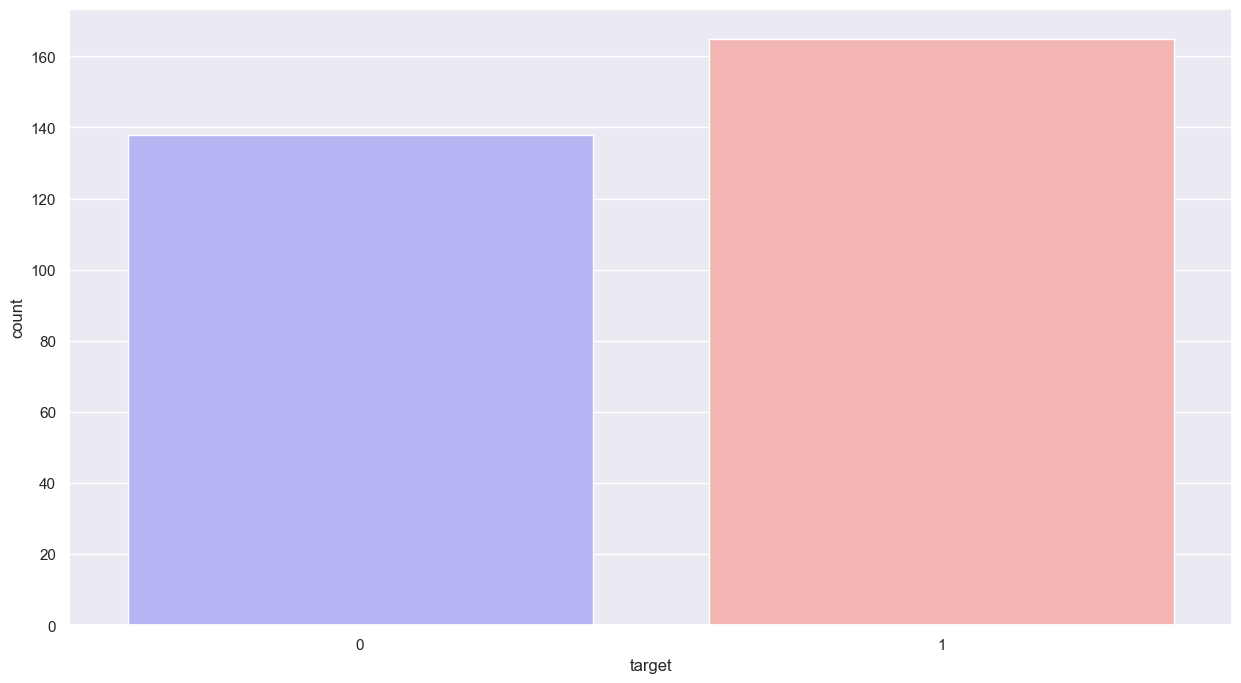

In [ ]:
sns.countplot(x='target',data=data,palette="bwr")
plt.show()

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [ ]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [ ]:
data.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


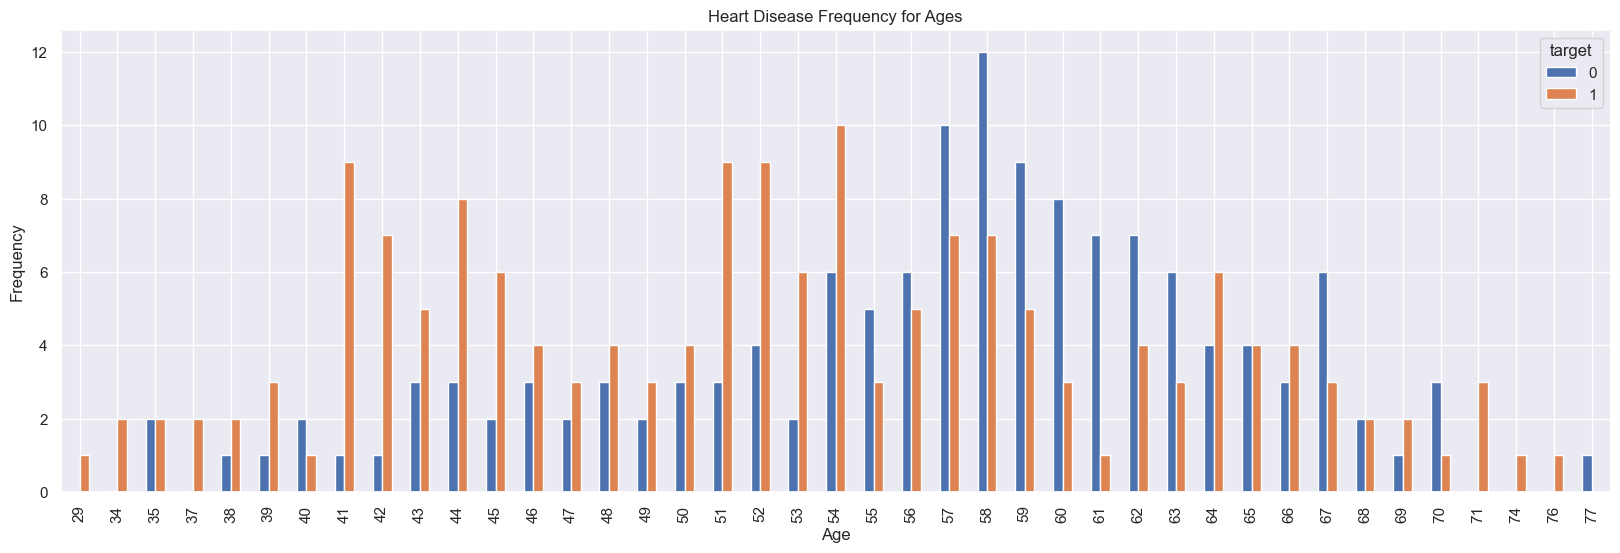

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

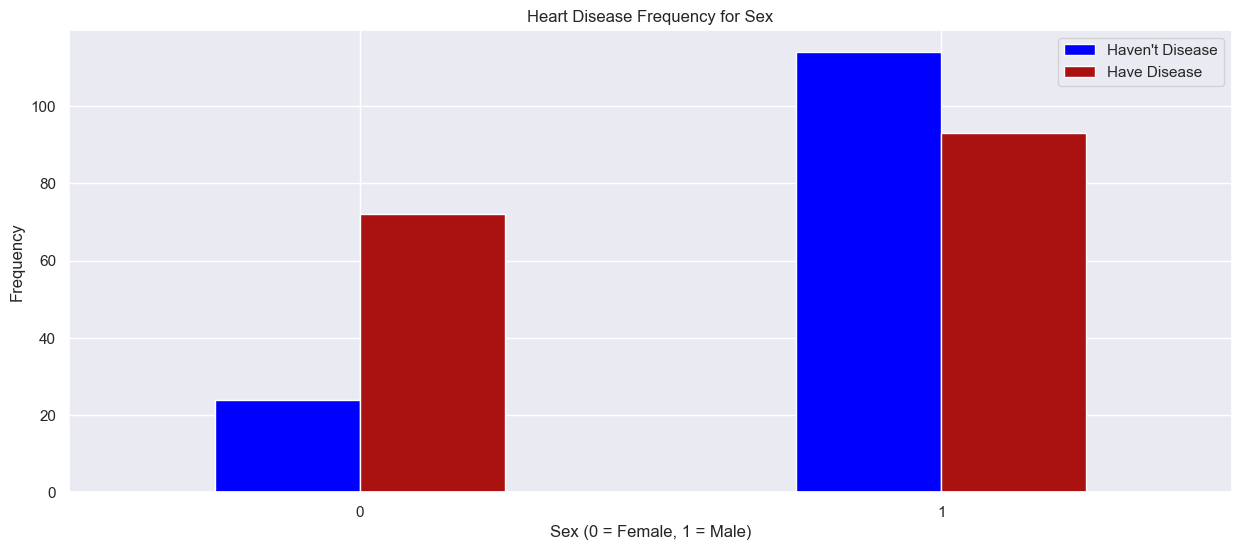

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

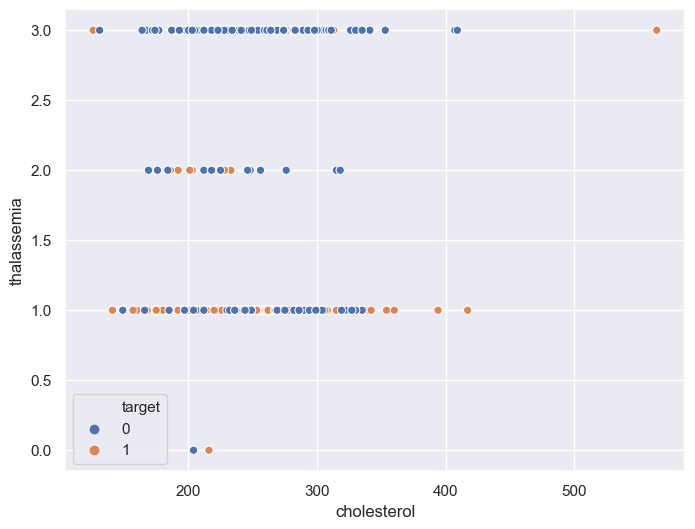

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

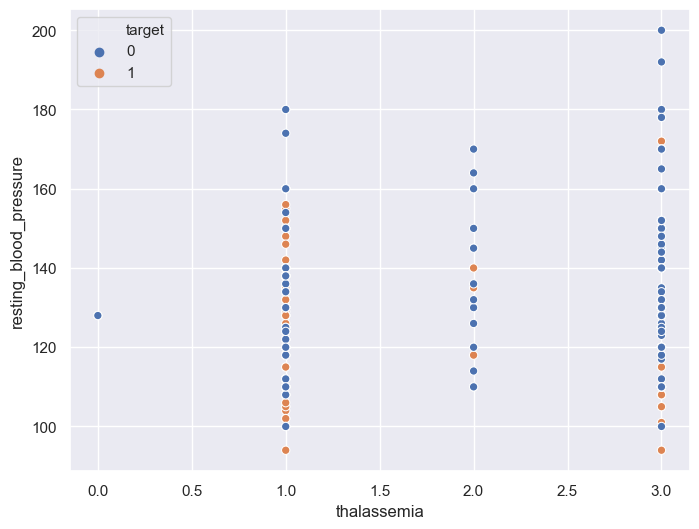

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

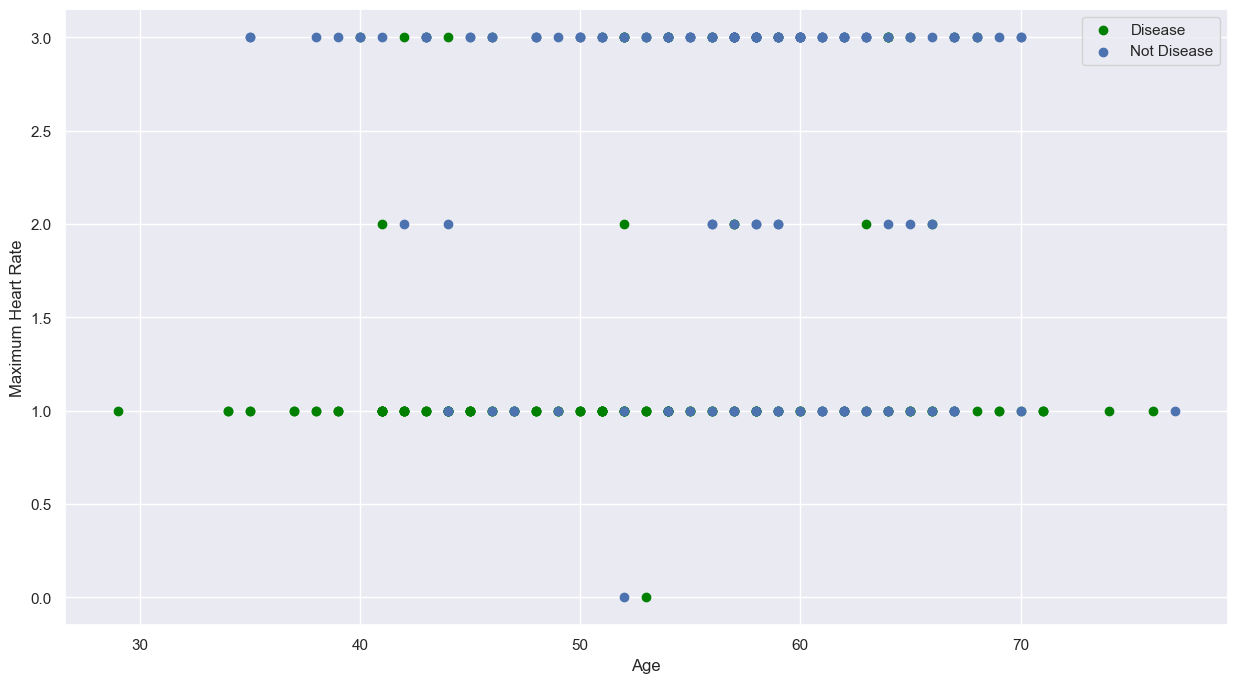

In [ ]:
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

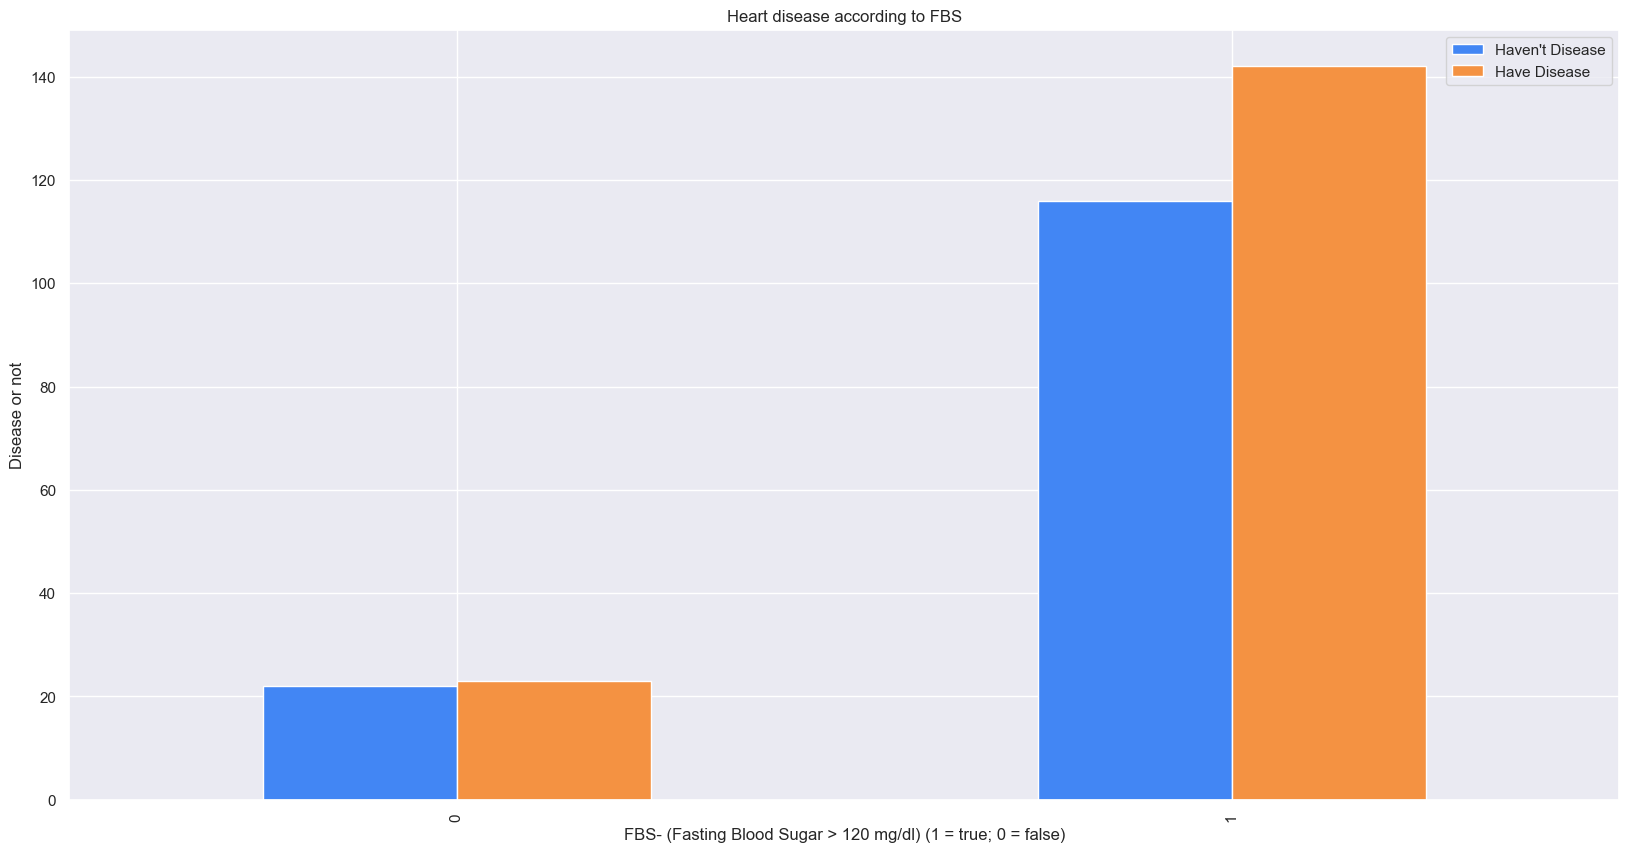

In [ ]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [ ]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

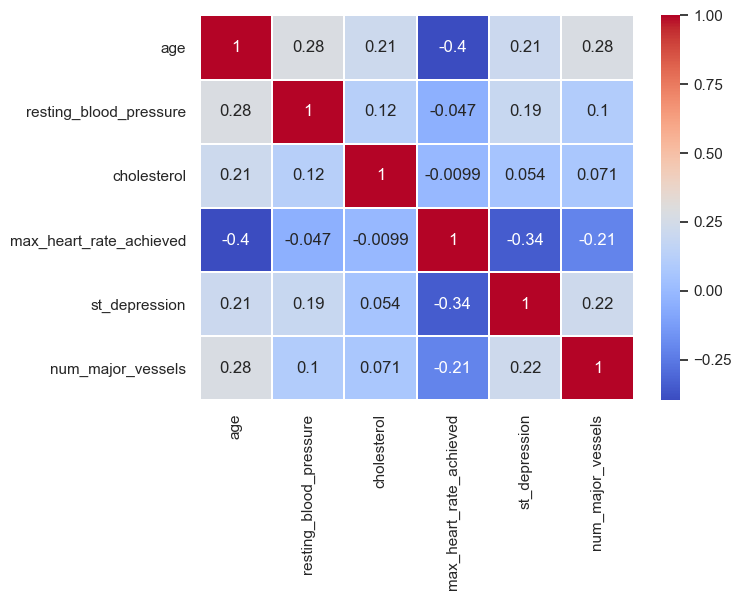

In [ ]:
names=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
data_corr = data.loc[:,names]
#Generate correlation matrix
corr = data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [ ]:
data_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


In [ ]:
X = data.drop("target",axis=1)

Y= data["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
# KNN Model

from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is an array of strings representing class labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train_encoded)
Y_pred_knn = knn.predict(X_test)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Check shapes of Y_pred_knn and Y_test
print("Shape of Y_pred_knn:", Y_pred_knn.shape)
print("Shape of Y_test:", Y_test.shape)

# Check data types of Y_pred_knn and Y_test
print("Data type of Y_pred_knn:", Y_pred_knn.dtype)
print("Data type of Y_test:", Y_test.dtype)

# Convert data types if necessary
Y_pred_knn = Y_pred_knn.astype(int)  # Convert to integer if Y_pred_knn is not already int
Y_test = Y_test.astype(int)  # Convert to integer if Y_test is not already int

# Verify target values
print("Unique values in Y_pred_knn:", np.unique(Y_pred_knn))
print("Unique values in Y_test:", np.unique(Y_test))

# Calculate accuracy score
score_knn_7 = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn_7) + " %")

Shape of Y_pred_knn: (61,)
Shape of Y_test: (61,)
Data type of Y_pred_knn: int32
Data type of Y_test: object
Unique values in Y_pred_knn: [0 1]
Unique values in Y_test: [0 1]
The accuracy score achieved using KNN is: 67.21 %


In [ ]:

from sklearn.metrics import accuracy_score
score_knn_7 = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn_7)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is an array of strings representing class labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

knn_model = KNeighborsClassifier(n_neighbors=4).fit(X_train, Y_train_encoded)
knn_predictions = knn_model.predict(X_test)


In [ ]:
# build confusion metrics
CM=pd.crosstab(Y_test,knn_predictions)
CM

col_0,0,1
target,,
0,19,8
1,14,20


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is an array of strings representing class labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

k_range = range(1, 26)
scores = []

from sklearn import metrics

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train_encoded)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

print(scores)


[0.5245901639344263, 0.6065573770491803, 0.6557377049180327, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.7049180327868853, 0.6885245901639344, 0.7213114754098361, 0.6721311475409836, 0.6721311475409836, 0.7049180327868853, 0.7213114754098361, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.7049180327868853, 0.7049180327868853, 0.6721311475409836, 0.6557377049180327, 0.6721311475409836]


In [ ]:
#let us save TP, TN, FP, FN
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#check accuracy of model
score_knn_4=((TP+TN)*100)/(TP+TN+FP+FN)
score_knn_4

63.9344262295082

In [ ]:
# check false negative rate of the model
fnr=FN*100/(FN+TP)
fnr

41.1764705882353

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train is an array of strings representing class labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

lr = LogisticRegression()
lr.fit(X_train, Y_train_encoded)
Y_pred_lr = lr.predict(X_test)


c:\Users\91918\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %


Top 5 most important features:
thalassemia
chest_pain_type
num_major_vessels
st_depression
max_heart_rate_achieved


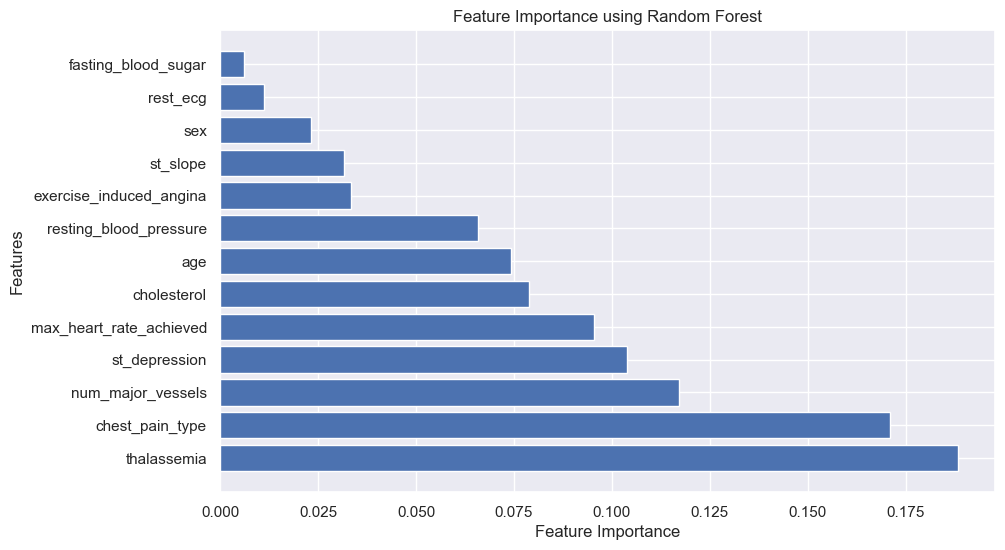

Random Forest Algorithm Results Results:
Random Forest Regression Model Score is  91
RMSE: 0.3417121787627039
MSE: 0.11676721311475409
MAE: 0.24360655737704917
R-squared: 0.5317987068965517
Training score:  0.9170886666206801
Testing score:  0.9149483836206896


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Applying the randomforest algorithm and finding the accuracy rate,RMSE,MSE,MAEand R Squred Values
# X=df.drop(['SALES_PRICE'], axis= 1)
# y=df['SALES_PRICE']

X_train,X_test,Y_train,Y_test  = train_test_split(X, Y, test_size=0.2,random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)
Y_pred = rf_regressor.predict(X_test)

rf_regressor.fit(X, Y)

# Feature importance
importance = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(importance)[::-1]

# Select the top 5 most important features
top_features = feature_names[sorted_indices][:5]
print("Top 5 most important features:")
for feature in top_features:
    print(feature)


sorted_indices = np.argsort(importance)[::-1]

# Select the top features
top_features = feature_names[sorted_indices]
top_importances = importance[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()



print('Random Forest Algorithm Results Results:')
# Calculate Accuracy score
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,Y_test)*100))
score_rf=round(rf_regressor.score(X_test,Y_test)*100)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

# Calculate MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("MAE:", mae)

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

print('Training score: ',rf_regressor.score(X_train,Y_train))
print('Testing score: ',rf_regressor.score(X_test,Y_test))


In [ ]:
scores = [score_lr,score_knn_7,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Random Forest is: 91 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

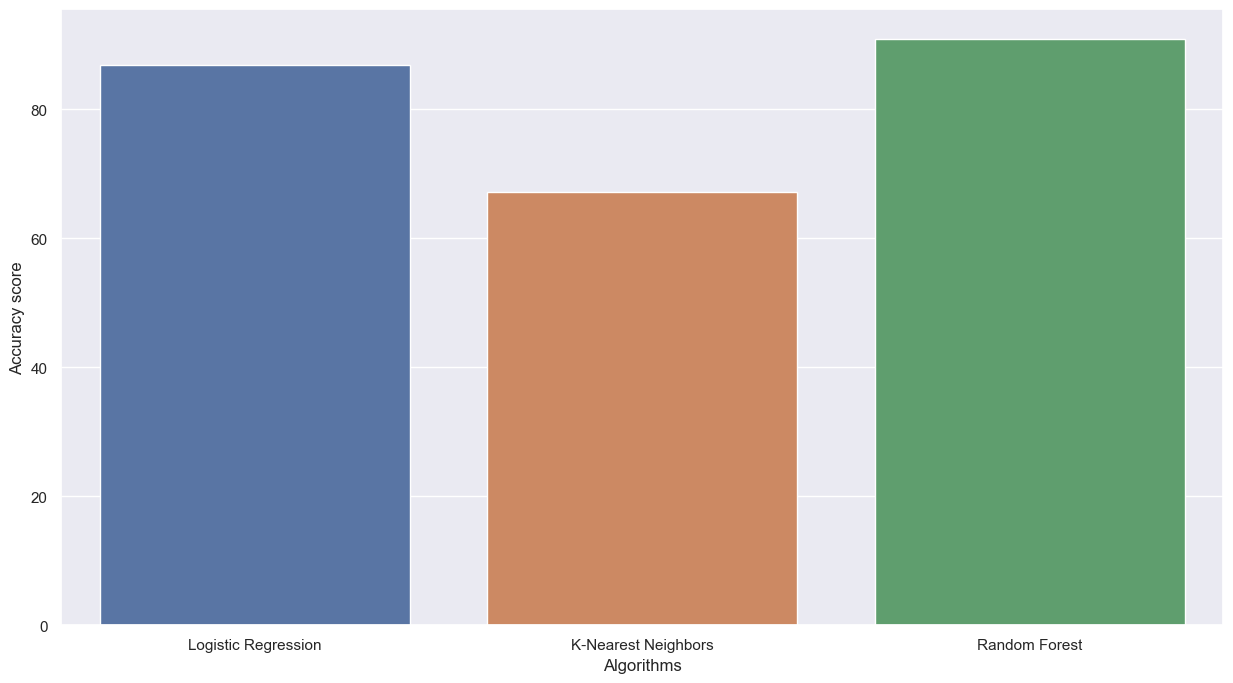

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)